# Analysing a 360 giving dataset

This notebook takes you step-by-step through analysing a 360 Giving spreadsheet, using python. In particular we'll be using a package called `pandas`, and the `iplotter` package which helps integrate `ChartJS` charts.

The analysis will start by looking at just the dataset itself. We'll look at:

- distribution of grants over time
- the amount of the grants
- which grant programmes have been used
- where organisations have been funded

We can then add additional information by matching the records against charity records, and running keyword searches against the recipients to find the type of organisations and beneficiaries they may have. These keyword searches won't correctly classify every grant, but they give an idea of the spread of activities. Once we know the charity numbers of recipients, we can bring in data like their income or where they work.

Finally, we can also compare the grants dataset against other grantmakers to look at similarities and differences between them using the analysis above.

## Getting python set up

A good way to install python and some of the packages needed for this notebook is to use [Anaconda](https://www.continuum.io/downloads) or [MiniConda](https://conda.io/miniconda.html). The notebook is written using Python 3, though it would be fairly easy to convert it into Python 3.

We then need to install packages. This is done using `pip`. Run the following commands through the command line:

```bash
pip install pandas
pip install matplotlib
pip install requests
```

This will make these packages available for use. Some may already be installed through Anaconda.

It's also worth looking in [virtual environments](https://docs.python.org/3/library/venv.html) to make it easier to manage packages for a single project. 

We then import these packages, and some inbuilt packages, into the notebook to make them available for us to use.

In [1]:
from __future__ import print_function # helps with python 2 compatability
import pandas as pd       # Pandas data analysis library
import requests           # fetch the CSV from the internet

For `matplotlib` for plotting charts we need to set it up to display the charts inline, and then load the library. We'll set it up so that the charts use a particular style (you can change this to one of the [styles shown in this gallery](https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html))

In [269]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')
from matplotlib.ticker import FuncFormatter
import numpy as np

## Import the data

The data is imported from a CSV file made available by the Big Lottery Fund. You can find it listed in the [360 Giving data registry](http://www.threesixtygiving.org/data/data-registry/). 

First we'll download the CSV file from the URL provided in the data registry and save it to a CSV file in the same directory.

In [ ]:
# URL of the grants data
grant_url = "https://www.biglotteryfund.org.uk/-/media/Files/Research%20Documents/aOpenDataFiles/BLFOpenData_2004_2015_V41.csv"
grant_csv = "blf_grants.csv" # filename we'll save it to

In [3]:
response = requests.get(grant_url) # fetch the URL
with open(grant_csv, 'wb') as a:   # open the new file for writing to
    a.write(response.content)      # write the content

The grants data is now downloaded to the directory. We can now import it as a Pandas "DataFrame", which is a table of the data. We'll call this `g` to make it easy to refer to later.

In [159]:
g = pd.read_csv(grant_csv, encoding='latin1')

Anything you leave on its own at the end of an ipython notebook cell gets printed as output, so you can look at a snapshot of the data by just putting `g` in a cell.

In [160]:
g

,Amount Applied For,Amount Awarded,Award Date,BIGField_Organisation_Type,Currency,Description,Funding Org:Identifier,Funding Org:Name,Grant Programme:Code,Grant Programme:Title,...,Planned Dates:Start Date,Recipient Org:Charity Number,Recipient Org:Company Number,Recipient Org:Identifier,Recipient Org:Location:0:Geographic Code,Recipient Org:Location:0:Name,Recipient Org:Location:1:Geographic Code,Recipient Org:Location:1:Name,Recipient Org:Name,Title
0,197.00,611.0,2004-04-01,Charity : Charitable Unincorporated Association,GBP,An automatic bingo machine and raffle MultiMat...,360G-blf,The Big Lottery Fund,A4E2,Awards for All,...,2004-04-28,NaN,NaN,360G-blf-org-ShepwayActiveRetirementAssociatio...,E05005042,Folkestone Morehall,E07000112,Shepway,Shepway Active Retirement Association,Bingo machine
1,550.00,550.0,2004-04-01,Charity : Registered Charity,GBP,Older members will be able to go on the Guild'...,360G-blf,The Big Lottery Fund,A4E2,Awards for All,...,2004-04-28,1083835,NaN,GB-CHC-1083835,E05005101,Viking,E07000114,Thanet,Ramsgate Albion Evening Towns Women's Guild,75th anniversary outing
2,600.00,600.0,2004-04-01,Charity : Charitable Unincorporated Association,GBP,Denmead will run a week long summer mini commu...,360G-blf,The Big Lottery Fund,A4E2,Awards for All,...,2004-04-28,NaN,NaN,360G-blf-org-TheDenmeadFestivalCharity:Charita...,E05004657,Denmead,E07000094,Winchester,The Denmead Festival,Pilot Festival
3,710.00,710.0,2004-04-01,Charity : Charitable Unincorporated Association,GBP,This community group support the residents in ...,360G-blf,The Big Lottery Fund,A4E3,Awards for All,...,2004-04-16,NaN,NaN,360G-blf-org-StHelenAucklandResidentsAssociati...,E05009089,West Auckland,E06000047,County Durham,St Helen Auckland Residents Association,Gala Day
4,950.00,550.0,2004-04-01,Charity : Registered Charity,GBP,This branch will purchase its first digital ca...,360G-blf,The Big Lottery Fund,A4E2,Awards for All,...,2004-04-28,1017031,NaN,GB-CHC-1017031,E05002639,Chalfont St. Giles,E07000005,Chiltern,Chalfont St. Giles Afternoon W.I.,Purchase of digital camera & printer
5,1000.00,1000.0,2004-04-01,Charity : Registered Charity,GBP,Local children from special schools will have ...,360G-blf,The Big Lottery Fund,A4E2,Awards for All,...,2004-04-28,1097288,4741864,GB-CHC-1097288,E05007692,Hurstpierpoint and Downs,E07000228,Mid Sussex,Brighton Early Music Festival,Music education work in special schools
6,1026.00,1026.0,2004-04-01,Charity : Exempt Charity,GBP,This church would like to improve the faciliti...,360G-blf,The Big Lottery Fund,A4E3,Awards for All,...,2004-04-16,NaN,NaN,360G-blf-org-PontelandUnitedReformChurchCharit...,E05009142,Ponteland East and Stannington,E06000057,Northumberland,Ponteland United Reform Church,toys and cupboard
7,1200.00,1200.0,2004-04-01,Charity : Registered Charity,GBP,This group provide a ward visiting service to ...,360G-blf,The Big Lottery Fund,A4E3,Awards for All,...,2004-04-16,515869,NaN,GB-CHC-515869,E05001572,Northgate,E06000005,Darlington,Darlington Hospital Radio (Radio Skerne),Studio Update
8,1266.00,1266.0,2004-04-01,Charity : Charitable Unincorporated Association,GBP,The group will buy presentation equipment. Th...,360G-blf,The Big Lottery Fund,A4E2,Awards for All,...,2004-04-28,NaN,NaN,360G-blf-org-EastSurreyRSPBMembersGroupCharity...,E05007405,Warlingham West,E07000215,Tandridge,East Surrey RSPB Members Group,Illustrated talks for schools
9,1407.00,1407.0,2004-04-01,Charity : Registered Charity,GBP,This branch of the U3A will improve the delive...,360G-blf,The Big Lottery Fund,A4E2,Awards for All,...,2004-04-28,297946,NaN,GB-CHC-297946,E05003952,Lewes Priory,E07000063,Lewes,Lewes U 3 A (University Of The Third Age),Lewes University of the Third Age


At the bottom of the table display we see the shape of the dataframe - the number of rows and columns. You can also access this through the `.shape` attribute.

In [161]:
g.shape

(163238, 23)

So we have 163,238 rows across 23 columns.

## Checking and transforming the data

Raw data is not always useful. We need to check the data formats, perhaps making sure that amounts are registered as numbers and dates formatted as dates.

Pandas adds its own identifier to the datatable, but the grants data comes with an identifier, so we can set that up. Pandas calls this an "index". 

(We could also have done this in the `read_csv` command by adding the parameter `index_col=["Identifier"]`. I've added the `inplace=True` parameter to make sure that the variable itself is changed rather than creating a copy of the dataframe. An alternative to this is running `g = g.set_index("Identifier")`.

In [162]:
g.set_index("Identifier", inplace=True)

Next we check the types of all the columns to see if any need to be changed to reflect the data in them. We particularly want the `Award Date` to be a date field and the `Amount Awarded` to be a number.

In [163]:
for c in g.columns:
    print(c, g[c].dtype)

Amount Applied For float64
Amount Awarded float64
Award Date object
BIGField_Organisation_Type object
Currency object
Description object
Funding Org:Identifier object
Funding Org:Name object
Grant Programme:Code object
Grant Programme:Title object
Last modified object
Planned Dates:Duration (months) int64
Planned Dates:Start Date object
Recipient Org:Charity Number object
Recipient Org:Company Number object
Recipient Org:Identifier object
Recipient Org:Location:0:Geographic Code object
Recipient Org:Location:0:Name object
Recipient Org:Location:1:Geographic Code object
Recipient Org:Location:1:Name object
Recipient Org:Name object
Title object


`Amount Awarded` and other amount fields have been correctly recognised as a number, but the date fields haven't been recognised as dates.

We check the format of these fields by looking at a sample of them, using the `.head()` command.

In [164]:
date_fields = ["Award Date", "Planned Dates:Start Date"]
g[date_fields].head(5)

,Award Date,Planned Dates:Start Date
Identifier,,
360G-blf-A4E_2_010103330,2004-04-01,2004-04-28
360G-blf-A4E_2_010107036,2004-04-01,2004-04-28
360G-blf-A4E_2_010105765,2004-04-01,2004-04-28
360G-blf-A4E_3_010108027,2004-04-01,2004-04-16
360G-blf-A4E_2_010107113,2004-04-01,2004-04-28


Looks like all three date fields use the _year-month-day_ format. In python this is represented as `%Y-%m-%d`. Going through each field we can use pandas' `.to_datetime()` function to convert them.

`.loc[]` allows us to extract and modify a "series" (column) within the dataframe. 

In [165]:
for df in date_fields:
    g.loc[:,df] = pd.to_datetime( g.loc[:,df], format="%Y-%m-%d" )

Check that the columns are in the right format by repeating the command from above.

In [166]:
g[date_fields].head(5)

,Award Date,Planned Dates:Start Date
Identifier,,
360G-blf-A4E_2_010103330,2004-04-01,2004-04-28
360G-blf-A4E_2_010107036,2004-04-01,2004-04-28
360G-blf-A4E_2_010105765,2004-04-01,2004-04-28
360G-blf-A4E_3_010108027,2004-04-01,2004-04-16
360G-blf-A4E_2_010107113,2004-04-01,2004-04-28


## Restrict to just one programme

We're only going to be looking at grants awarded in "Awards for All" grant programme. Let's look at the grant programme field to check the actual title

In [167]:
g.groupby(["Grant Programme:Title","Grant Programme:Code"]).size()

Grant Programme:Title                     Grant Programme:Code
2014 Communities                          CWG1                     3888
Active Futures                            SAV1                       41
Active Lifestyles                         ALS1                      248
Activities for Young People               WAY1                        1
AdvantAGE                                 AGE1                       30
Advice Plus                               AP1                        70
                                          AP2                        39
Advice Services Transition Fund           AST1                      234
Ageing Better                             AB1                        15
Ageing Better - Partnership Funding       ABD1                       32
Arrangements                              ARR1                      109
Awards for All                            A4E2                      371
                                          A4E3                    23825
 

So we're looking for any grants that start "Awards for All"

In [272]:
len(g[g["Grant Programme:Title"].str.startswith("Awards for All")])

29017

Looks like the right amount, so let's overwrite our data with just Awards for All.

In [169]:
g = g[g["Grant Programme:Title"].str.startswith("Awards for All")]

We're also going to restrict to the grants made in the same timeline as Community first

In [170]:
g= g[(g["Award Date"]>='2012-02-06 00:00:00') & (g["Award Date"]<= '2015-06-26 00:00:00')]

We can also add a `Grant Fiscal Year` field to align with the Community First grants data.

In [171]:
g.loc[:,"Grant Fiscal Year"] = None
for i in range(g["Award Date"].dt.year.min()-1, g["Award Date"].dt.year.max()+1):
    g.loc[(g["Award Date"]>='%s-04-01 00:00:00' % str(i)) & (g["Award Date"]<= '%s-03-31 00:00:00' % str(i+1)),"Grant Fiscal Year"] = i
g.loc[:,"Grant Fiscal Year"].value_counts().sort_index()

2011    1344
2012    8758
2013    8945
2014    9970
Name: Grant Fiscal Year, dtype: int64

## Basic analysis

We start the analysis by looking at the number of grants per year. We can first look at this in a view of the dataframe.

In [172]:
g["Grant Fiscal Year"].value_counts().sort_index()

2011    1344
2012    8758
2013    8945
2014    9970
Name: Grant Fiscal Year, dtype: int64

In [271]:
g["Grant Fiscal Year"].value_counts().sum()

29017

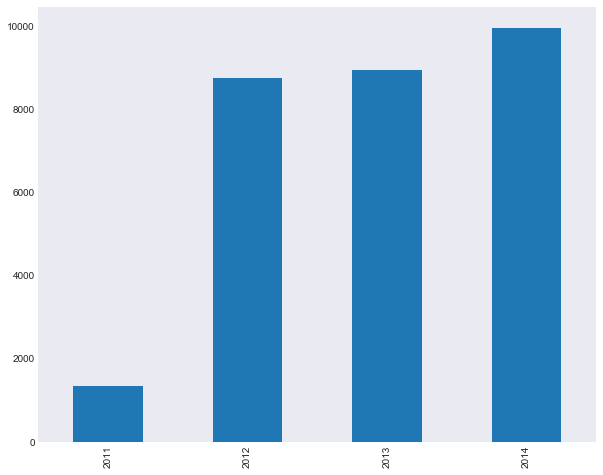

In [173]:
g["Grant Fiscal Year"].value_counts().sort_index().plot(kind="bar", figsize=(10,8))

Then look at the total amount awarded by year.

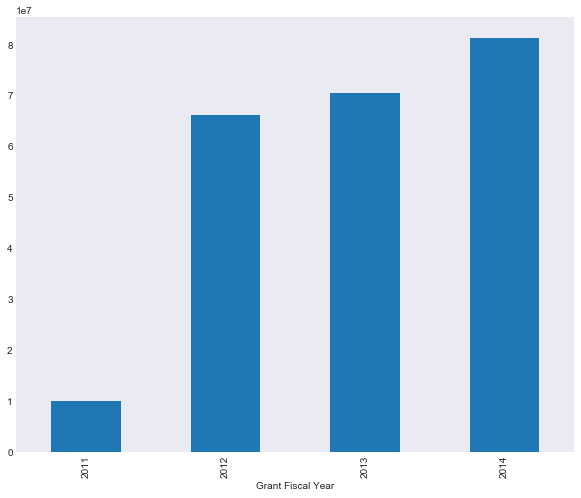

In [174]:
g.groupby(g["Grant Fiscal Year"]).sum()["Amount Awarded"].plot(kind="bar", figsize=(10,8))

This shows a incline in the amount awarded by year, leading up to 2014.

Let's look at the average size of the grant.

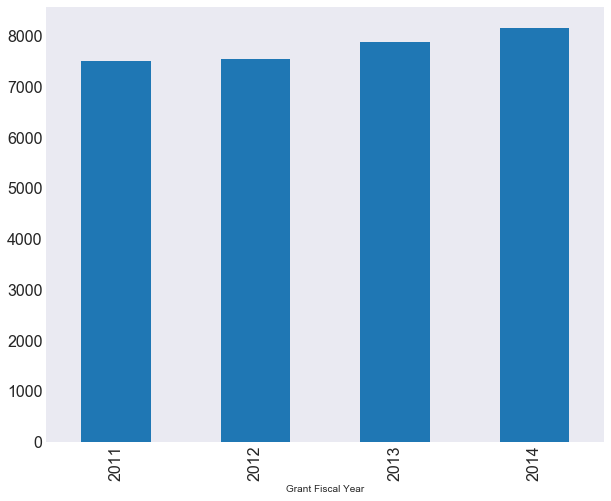

In [175]:
g.groupby(g["Grant Fiscal Year"]).mean()["Amount Awarded"].plot(kind="bar", figsize=(10,8), fontsize=16)

This shows grant size increasing gradually over the years, although the 2011 bar is based on a small number of grants.

It's fairly common for datasets to contain outliers that can distort our analysis. A good way to check for these is through a box plot. This shows the median, upper and lower quartiles of the data (the grants that are 25%, 50% and 75% along if ordered by amount).

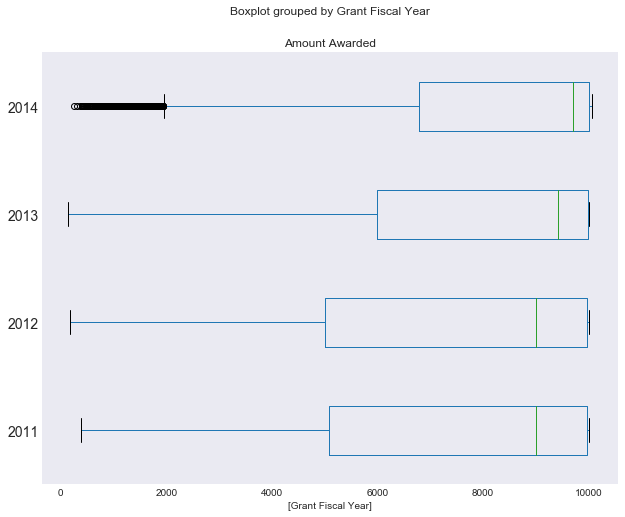

In [176]:
g[["Amount Awarded","Grant Fiscal Year"]].boxplot(by="Grant Fiscal Year", vert=False, grid=False, figsize=(10,8), fontsize=14)

In [177]:
g.groupby(g["Grant Fiscal Year"]).median()["Amount Awarded"]

Grant Fiscal Year
2011    9000.0
2012    9000.0
2013    9420.0
2014    9699.5
Name: Amount Awarded, dtype: float64

In [178]:
g.median()["Amount Awarded"]

9439.0

In [179]:
g.mean()["Amount Awarded"]

7862.1912968259894

This shows that there aren't large outliers at the top end - no grants are larger than £10,000. But at the smaller end the minimum grant size is near £0. These grants are worth looking at as they could affect the result. 

Let's take a look at the dataset to see how many grants there are less than £100.

In [180]:
g[g["Amount Awarded"] < 100]["Amount Awarded"].value_counts()

Series([], Name: Amount Awarded, dtype: int64)

This shows there are no payments of less than £100. A histogram of the amounts awarded will also give a good view of the distribution of the amounts.

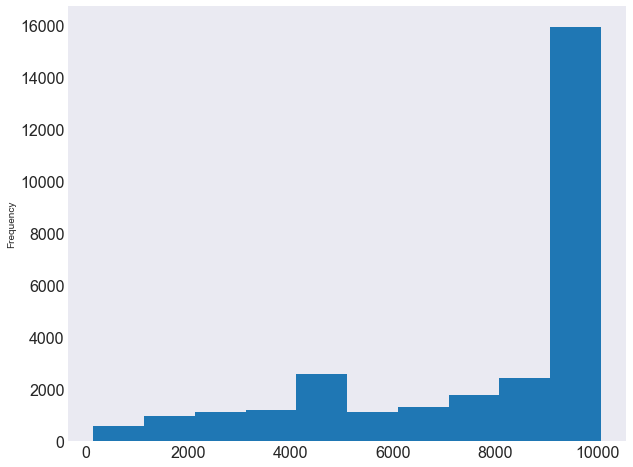

In [181]:
g["Amount Awarded"].plot(kind="hist", figsize=(10,8), fontsize=16)

This shows that there are two peaks around £5,000 and £10,000, presumably the two limits of the fund at different times.

In [182]:
g["Amount Awarded"].value_counts().head(10)

10000.0    6586
5000.0      757
9900.0      312
9950.0      267
9990.0      225
9500.0      215
9800.0      204
9995.0      184
9980.0      184
9000.0      171
Name: Amount Awarded, dtype: int64

So we can see that over 15,000 grants were made for the maximum amount of £10,000.

In [183]:
print( "{:,.0f}".format(g["Amount Awarded"].sum()) )

228,137,205


In [184]:
g.groupby(g["Grant Fiscal Year"]).sum()["Amount Awarded"]

Grant Fiscal Year
2011    10094160.10
2012    66171526.96
2013    70469150.38
2014    81402367.42
Name: Amount Awarded, dtype: float64

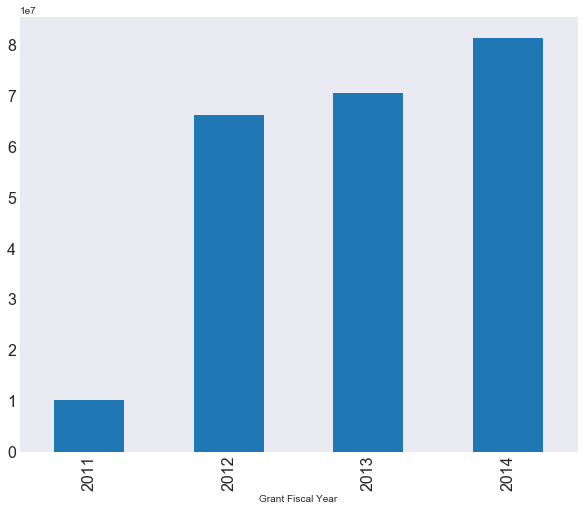

In [185]:
g.groupby(g["Grant Fiscal Year"]).sum()["Amount Awarded"].plot(kind="bar", figsize=(10,8), fontsize=16)

The total amount awarded by the fund in this period was £228 million. This is broken down to £66 million awarded in 2012, £70 million in 2013 and £81 million in 2014.

## Beneficiary location

Turning to the geographical distribution of grants, we can use the "Beneficiary Location" fields to examine the data. Let's use the `Geographic Code Type` field to check what types of geography is available. 

In [275]:
g.groupby([
    g["Recipient Org:Location:0:Geographic Code"].str[0:3], 
    g["Recipient Org:Location:1:Geographic Code"].str[0:3]
]).size()

Recipient Org:Location:0:Geographic Code  Recipient Org:Location:1:Geographic Code
95A                                       N09                                          105
95B                                       N09                                           27
95C                                       N09                                           48
95D                                       N09                                           55
95E                                       N09                                           23
95F                                       N09                                           29
95G                                       N09                                           60
95H                                       N09                                           58
95I                                       N09                                           65
95J                                       N09                                           24
95K    

This shows that `Recipient Org:Location:0` gives [_Ward_](http://statistics.data.gov.uk/area_collection?in_collection=http%3A%2F%2Fstatistics.data.gov.uk%2Fdef%2Fgeography%2Fcollection%2FE05) information (`E05`), while `Recipient Org:Location:1` is _Local Authority District_ level data (`E06`, `E07`, `E08`, `E09`). Lets use local authority to see the spread of the grants around the country.

In [187]:
g["Recipient Org:Location:1:Name"].value_counts()

Birmingham                               709
Glasgow City                             566
County Durham                            374
Cornwall                                 346
Sheffield                                332
Carmarthenshire                          319
Liverpool                                300
Bradford                                 293
Hackney                                  292
Belfast                                  292
Bolton                                   287
Manchester                               275
Leeds                                    263
City of Edinburgh                        248
Highland                                 242
North Lanarkshire                        238
South Lanarkshire                        231
Rotherham                                220
Armagh, Banbridge and Craigavon          218
Kirklees                                 218
City of Leicester                        217
Fife                                     212
Lambeth   

### Compare to index of multiple deprivation

This is a list of all local authorities along with the number of grants made. It would be useful to be able to group these areas though, to see how the patterns change across geography.

Let's download another dataset to give us another dimension to compare. We're going to download the English Indices of Multiple Deprivation from the [Open Data Communities](http://opendatacommunities.org/data/societal-wellbeing/imd/indicesbyla) site.

In [27]:
imd_url = "http://opendatacommunities.org/downloads/cube-table?uri=http%3A%2F%2Fopendatacommunities.org%2Fdata%2Fsocietal-wellbeing%2Fimd%2Findicesbyla"
imd_data = requests.get(imd_url)
with open("imd.csv", "wb") as imdfile:
    imdfile.write(imd_data.content)

In [188]:
imd_data = pd.read_csv("imd.csv")
imd_data.shape

(22168, 6)

Let's use the "Rank of average score" to determine how deprived each local authority is. We'll extract just that data from the dataset to get a single rank, and then put those ranks into deciles. The lower ranked areas are the more deprived.

In [189]:
imd_rank = imd_data[(imd_data["Measurement"]=="Rank of average score") 
         & (imd_data["Indices of Deprivation"]=="a. Index of Multiple Deprivation (IMD)")]\
        [["GeographyCode", "Value"]].set_index("GeographyCode")["Value"]
imd_rank = pd.qcut(imd_rank, 10)
imd_rank = imd_rank.cat.rename_categories(range(0,10))
imd_rank.name = "IMD Rank"
imd_rank.sort_values()

GeographyCode
E07000120    0
E08000032    0
E07000062    0
E06000021    0
E06000018    0
E06000016    0
E07000114    0
E07000117    0
E09000002    0
E07000145    0
E06000012    0
E07000027    0
E06000010    0
E06000009    0
E09000030    0
E09000025    0
E06000008    0
E06000001    0
E06000002    0
E09000019    0
E06000006    0
E09000014    0
E08000031    0
E08000030    0
E09000012    0
E08000012    0
E08000003    0
E08000005    0
E08000006    0
E08000028    0
            ..
E07000131    9
E07000217    9
E07000216    9
E07000176    9
E07000227    9
E07000085    9
E07000155    9
E07000087    9
E07000006    9
E07000240    9
E07000077    9
E07000005    9
E07000089    9
E07000094    9
E07000068    9
E07000102    9
E07000049    9
E06000040    9
E06000041    9
E09000027    9
E07000181    9
E07000086    9
E07000179    9
E07000012    9
E07000207    9
E07000208    9
E07000209    9
E07000210    9
E07000214    9
E07000180    9
Name: IMD Rank, dtype: category
Categories (10, int64): [0 < 1 < 2 < 3 

We can then add this column to the main dataframe by matching on the `Beneficiary Location:1:Geographic Code` field.

In [190]:
imd_merge = g.merge(pd.DataFrame(imd_rank), left_on="Recipient Org:Location:1:Geographic Code", right_index=True)

This allows us to see the distribution of grants by depriviation. If the grants were evenly spread throughout areas with no preference for more or less deprived areas, we would expect to see an even distribution across all ten deciles.

First we can look at the amount awarded by decile, which the table and chart show is skewed towards more deprived areas (0 is the most deprived).

In [191]:
imd_merge.groupby("IMD Rank").sum()["Amount Awarded"].sort_index() / g.sum()["Amount Awarded"]

IMD Rank
0    0.183785
1    0.137145
2    0.107389
3    0.057654
4    0.061223
5    0.062545
6    0.045385
7    0.050180
8    0.038519
9    0.026685
Name: Amount Awarded, dtype: float64

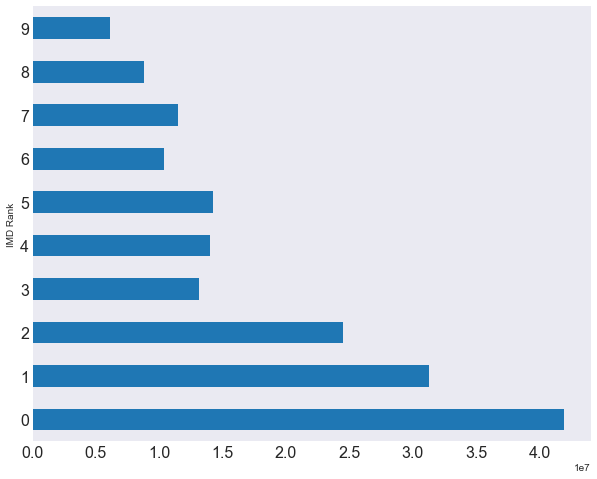

In [192]:
imd_merge.groupby("IMD Rank").sum()["Amount Awarded"].sort_index().plot(kind="barh", figsize=(10,8), fontsize=16)

This also holds true if looking at the number of grants made by IMD decile.

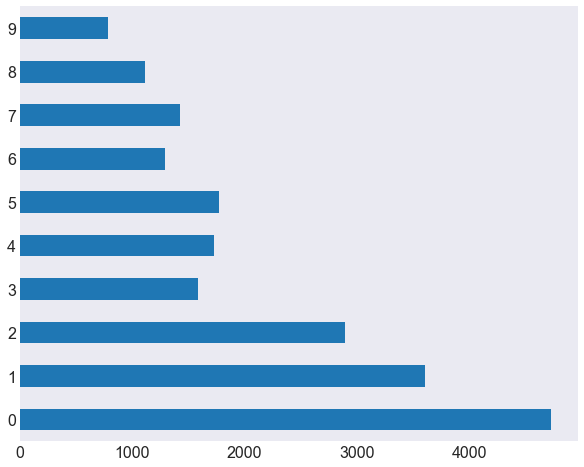

In [193]:
imd_merge["IMD Rank"].value_counts().sort_index().plot(kind="barh", figsize=(10,8), fontsize=16)

If looking at the distribution of grant amounts by IMD, there isn't a huge variation, except that the four most deprived areas do have a higher median amount awarded.

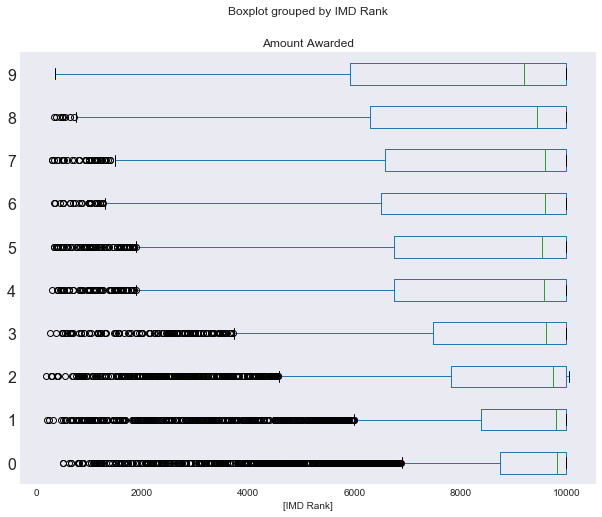

In [194]:
imd_merge[["Amount Awarded","IMD Rank"]].boxplot(by="IMD Rank", vert=False, grid=False, figsize=(10,8), fontsize=16)

## Merging with charity data

This data includes a charity number, so we can bring in details on charities from elsewhere. We can load this data from the "blf_matches_details.csv" spreadsheet. This includes the charity number matched to a recipient, plus two additional pieces of information:

- their latest income (in pounds)
- the categories they have been classified into (beneficiaries, services provided & theme)

In [67]:
pd.DataFrame(g[g["Recipient Org:Charity Number"].notnull()]["Recipient Org:Charity Number"]).to_csv("blf_charities.csv")

In [276]:
charities = pd.read_csv("blf_matches_details.csv")
charities.drop_duplicates(keep="first", inplace=True)
charities.set_index("Identifier", inplace=True)
charities

,Recipient Org:Charity Number,income,GENERAL CHARITABLE PURPOSES,EDUCATION/TRAINING,THE ADVANCEMENT OF HEALTH OR SAVING OF LIVES,DISABILITY,THE PREVENTION OR RELIEF OF POVERTY,OVERSEAS AID/FAMINE RELIEF,ACCOMMODATION/HOUSING,RELIGIOUS ACTIVITIES,...,MAKES GRANTS TO INDIVIDUALS,MAKES GRANTS TO ORGANISATIONS,PROVIDES OTHER FINANCE,PROVIDES HUMAN RESOURCES,PROVIDES BUILDINGS/FACILITIES/OPEN SPACE,PROVIDES SERVICES,PROVIDES ADVOCACY/ADVICE/INFORMATION,SPONSORS OR UNDERTAKES RESEARCH,ACTS AS AN UMBRELLA OR RESOURCE BODY,OTHER CHARITABLE ACTIVITIES
Identifier,,,,,,,,,,,,,,,,,,,,,
360G-blf-A4E_2_010107036,1083835,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
360G-blf-A4E_2_010107113,1017031,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN
360G-blf-A4E_2_010107783,1097288,207168.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN
360G-blf-A4E_3_010109192,515869,32.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
360G-blf-A4E_2_010107608,297946,1872.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
360G-blf-A4E_2_010107735,234343,2955941.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN
360G-blf-A4E_2_010106014,230601,56315.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
360G-blf-A4E_3_010109292,520815,19597.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
360G-blf-A4E_2_010106843,1081200,1759177.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN


Add the charities data into the main dataframe

In [196]:
g = g.merge(charities, how="left", left_index=True, right_index=True)

From this data we can look at some simple descriptive stats about the charities that have received funding from the fund. Let's start by looking at the average income of the recipients.

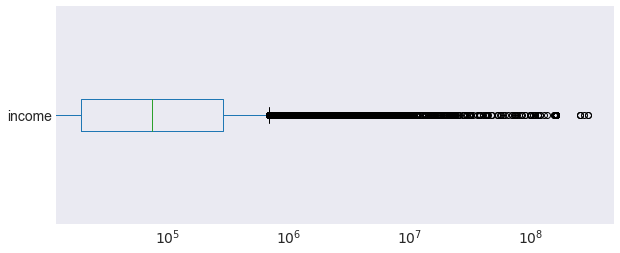

In [267]:
pd.DataFrame(g["income"]).plot(kind='box', vert=False, grid=False, figsize=(10,4), logx=True, fontsize=14)

In [203]:
g["income"].quantile([0,0.25,0.5,0.75,1]).map('{:,.0f}'.format)

0.00              0
0.25         19,099
0.50         73,938
0.75        285,367
1.00    298,660,000
Name: income, dtype: object

I've used a "log" scale for this box plot as it shows the range of sizes better - 10^5 is organisations with £100,000 income, 10^6 is £1 million and 10^7 is £10 million. It shows that most organisations are at the smaller end of the scale. The median income of an organisation is £74,000, with 25% of charities having an income of less than £19,000.

Some very large charities have been matched to grants. There are a number of possible explanations for this. They could be mismatched to an incorrect organisation, or it may be that the grant was to a local branch of a larger organisation.

In [204]:
charities.columns

Index(['Recipient Org:Charity Number', 'income', 'GENERAL CHARITABLE PURPOSES',
       'EDUCATION/TRAINING', 'THE ADVANCEMENT OF HEALTH OR SAVING OF LIVES',
       'DISABILITY', 'THE PREVENTION OR RELIEF OF POVERTY',
       'OVERSEAS AID/FAMINE RELIEF', 'ACCOMMODATION/HOUSING',
       'RELIGIOUS ACTIVITIES', 'ARTS/CULTURE/HERITAGE/SCIENCE',
       'AMATEUR SPORT', 'ANIMALS', 'ENVIRONMENT/CONSERVATION/HERITAGE',
       'ECONOMIC/COMMUNITY DEVELOPMENT/EMPLOYMENT',
       'ARMED FORCES/EMERGENCY SERVICE EFFICIENCY',
       'HUMAN RIGHTS/RELIGIOUS OR RACIAL HARMONY/EQUALITY OR DIVERSITY',
       'RECREATION', 'OTHER CHARITABLE PURPOSES', 'CHILDREN/YOUNG PEOPLE',
       'ELDERLY/OLD PEOPLE', 'PEOPLE WITH DISABILITIES',
       'PEOPLE OF A PARTICULAR ETHNIC OR RACIAL ORIGIN',
       'OTHER CHARITIES OR VOLUNTARY BODIES', 'OTHER DEFINED GROUPS',
       'THE GENERAL PUBLIC/MANKIND', 'MAKES GRANTS TO INDIVIDUALS',
       'MAKES GRANTS TO ORGANISATIONS', 'PROVIDES OTHER FINANCE',
       'PROVIDE

Let's work out the number of charities in the data, so we can work out the percentages.

In [236]:
no_char = len(g[g["Recipient Org:Charity Number_y"].notnull()])

First look at the "theme" the organisation works in.

In [237]:
theme = ((g[['GENERAL CHARITABLE PURPOSES',
       'EDUCATION/TRAINING', 'THE ADVANCEMENT OF HEALTH OR SAVING OF LIVES',
       'DISABILITY', 'THE PREVENTION OR RELIEF OF POVERTY',
       'OVERSEAS AID/FAMINE RELIEF', 'ACCOMMODATION/HOUSING',
       'RELIGIOUS ACTIVITIES', 'ARTS/CULTURE/HERITAGE/SCIENCE',
       'AMATEUR SPORT', 'ANIMALS', 'ENVIRONMENT/CONSERVATION/HERITAGE',
       'ECONOMIC/COMMUNITY DEVELOPMENT/EMPLOYMENT',
       'ARMED FORCES/EMERGENCY SERVICE EFFICIENCY',
       'HUMAN RIGHTS/RELIGIOUS OR RACIAL HARMONY/EQUALITY OR DIVERSITY',
       'RECREATION', 'OTHER CHARITABLE PURPOSES']].sum().sort_values(ascending=False) / no_char) * 100)
theme.index = theme.index.map(str.title)
theme.map('{:,.1f}%'.format)

Education/Training                                                56.2%
General Charitable Purposes                                       33.9%
Economic/Community Development/Employment                         28.3%
Amateur Sport                                                     26.2%
Arts/Culture/Heritage/Science                                     24.2%
The Advancement Of Health Or Saving Of Lives                      23.4%
Disability                                                        22.3%
The Prevention Or Relief Of Poverty                               19.1%
Recreation                                                        14.1%
Environment/Conservation/Heritage                                 11.0%
Other Charitable Purposes                                          9.0%
Religious Activities                                               7.0%
Accommodation/Housing                                              6.4%
Human Rights/Religious Or Racial Harmony/Equality Or Diversity  

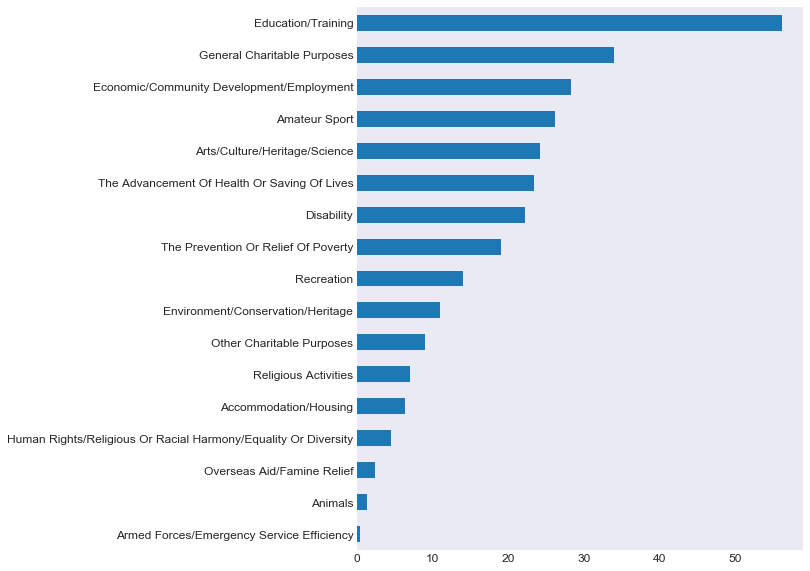

In [270]:
theme.sort_values(ascending=True).plot(kind="barh", fontsize=12, figsize=(8,10))

Then the type of activity they undertake.

In [239]:
activity = ((g[['MAKES GRANTS TO INDIVIDUALS',
       'MAKES GRANTS TO ORGANISATIONS', 'PROVIDES OTHER FINANCE',
       'PROVIDES HUMAN RESOURCES', 'PROVIDES BUILDINGS/FACILITIES/OPEN SPACE',
       'PROVIDES SERVICES', 'PROVIDES ADVOCACY/ADVICE/INFORMATION',
       'SPONSORS OR UNDERTAKES RESEARCH',
       'ACTS AS AN UMBRELLA OR RESOURCE BODY', 'OTHER CHARITABLE ACTIVITIES']].sum().sort_values(ascending=False) / no_char) * 100)
activity.index = activity.index.map(str.title)
activity.map('{:,.1f}%'.format)

Provides Services                           57.8%
Provides Advocacy/Advice/Information        42.4%
Provides Buildings/Facilities/Open Space    40.4%
Provides Human Resources                    28.1%
Acts As An Umbrella Or Resource Body        13.7%
Other Charitable Activities                 12.1%
Sponsors Or Undertakes Research              9.0%
Makes Grants To Organisations                6.9%
Makes Grants To Individuals                  5.4%
Provides Other Finance                       2.0%
dtype: object

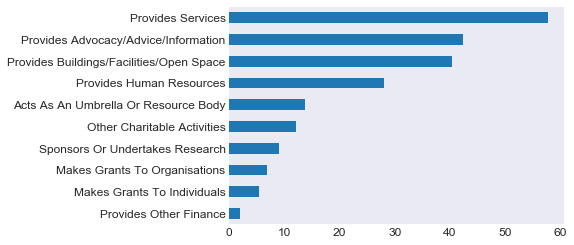

In [240]:
activity.sort_values(ascending=True).plot(kind="barh", fontsize=12)

Finally, the beneficiaries they work with.

In [241]:
beneficiaries = ((g[['CHILDREN/YOUNG PEOPLE',
       'ELDERLY/OLD PEOPLE', 'PEOPLE WITH DISABILITIES',
       'PEOPLE OF A PARTICULAR ETHNIC OR RACIAL ORIGIN',
       'OTHER CHARITIES OR VOLUNTARY BODIES', 'OTHER DEFINED GROUPS',
       'THE GENERAL PUBLIC/MANKIND']].sum().sort_values(ascending=False) / no_char) * 100)
beneficiaries.index = beneficiaries.index.map(str.title)
beneficiaries.map('{:,.1f}%'.format)

Children/Young People                             59.6%
The General Public/Mankind                        46.9%
People With Disabilities                          41.0%
Elderly/Old People                                36.6%
Other Charities Or Voluntary Bodies               22.4%
Other Defined Groups                              18.7%
People Of A Particular Ethnic Or Racial Origin    14.8%
dtype: object

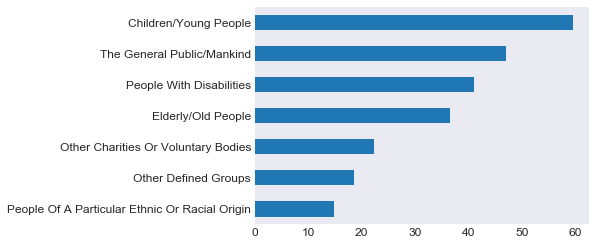

In [242]:
beneficiaries.sort_values(ascending=True).plot(kind="barh", fontsize=12)

We can also compare the amount requested by the charity with their total income, which might give an indication of the size of ambition. NB, this isn't a perfect judgement - the income value is their latest available income, so could include funding and activities that have taken place since they received the award.

In [247]:
pc_income = (g["Amount Awarded"] / g["income"]).dropna()

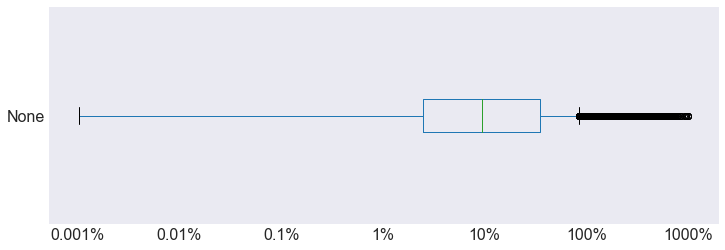

In [266]:
ax = pc_income[pc_income < 10].plot.box(logx=True, vert=False, fontsize=16, figsize=(12,4))
ax.xaxis.set_major_formatter(FuncFormatter(lambda y, _: '{{:.{:1d}%}}'.format(int(np.maximum(-np.log10(y)-2,0))).format(y)))

Save the completed dataset as a "pickle" which can be used elsewhere.

In [268]:
g.to_pickle("afa.pkl")